In [93]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False


In [94]:
def fitfunction(x,a,b):
    return a * (1-2*np.array(x)/b)

In [95]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

In [96]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints = npoints + 1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        
        
        

In [97]:
if use_errors == True:
    # create a list to hold the uncertainty in the density  
    gravity_uncertainty = [0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0001,
                           0.0001, 0.0001, 0.00001, 0.00001, 0.000001, 0.0000001, 0.0000001]
else:
    gravity_uncertainty = [0.0] * len(gravity)

gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity m/s^2')

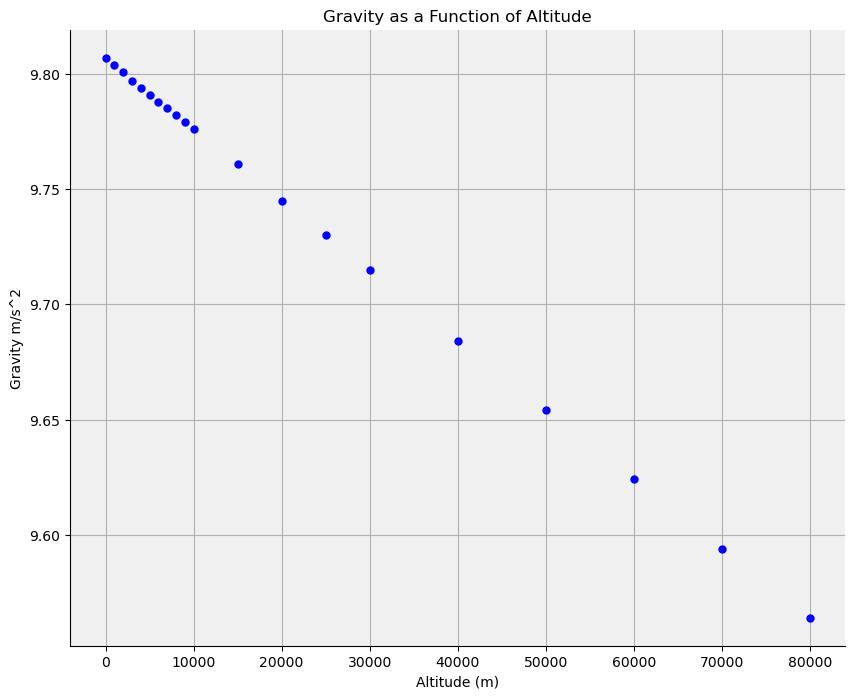

In [98]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
                 marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
             marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity m/s^2")
#plt.yscale("log")

In [99]:
from scipy.optimize import curve_fit


init_vals = [9.81, 6378000]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print(popt)
print(pcov)

[9.80635969e+00 6.45444507e+06]
[[ 1.86774208e-08 -8.07514343e-01]
 [-8.07514343e-01  7.71929014e+07]]


In [100]:
yfit = []
chi2 = 0
for i in range(0, npoints):
    yfit.append(fitfunction(altitude[i], *popt))
    chi2 += (gravity[i] - yfit[i]) * (gravity[i] - yfit[i])

print("Chi^2 / dof = %.3E / %d" % (chi2, npoints - len(init_vals)))

Chi^2 / dof = 3.632E-06 / 18


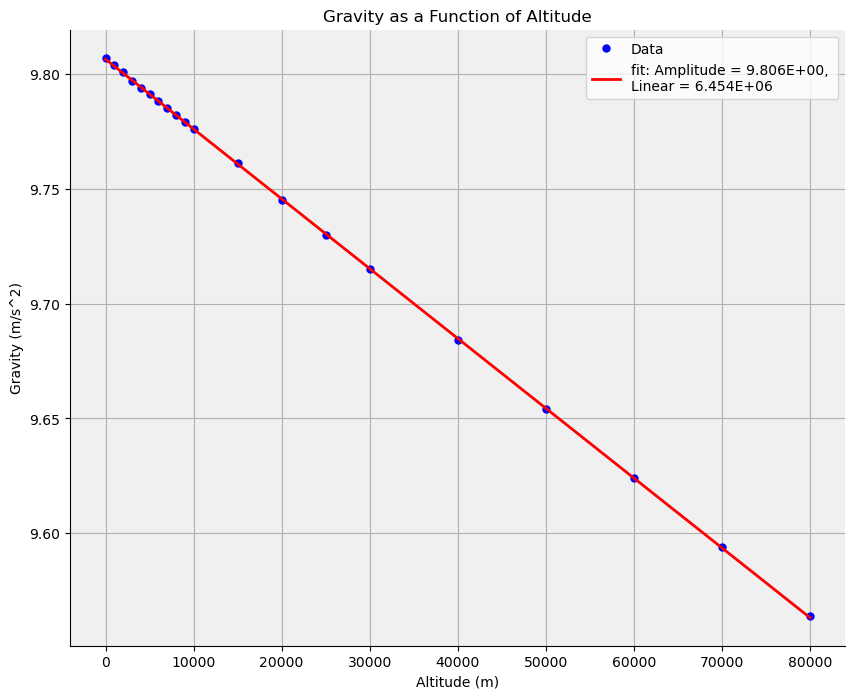

In [101]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude, yfit, color='r', linewidth=2, label='fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.legend()

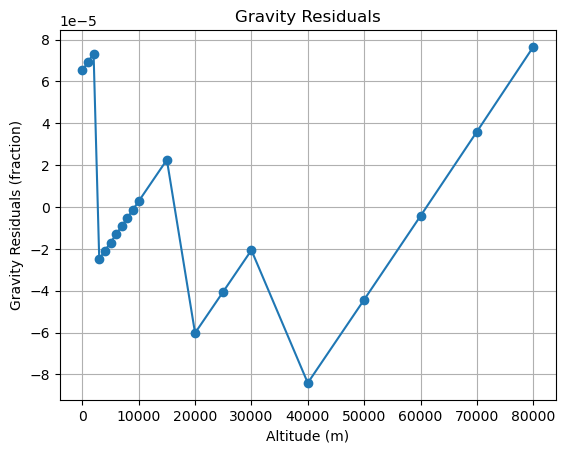

In [102]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)) / gravity, 'o-')

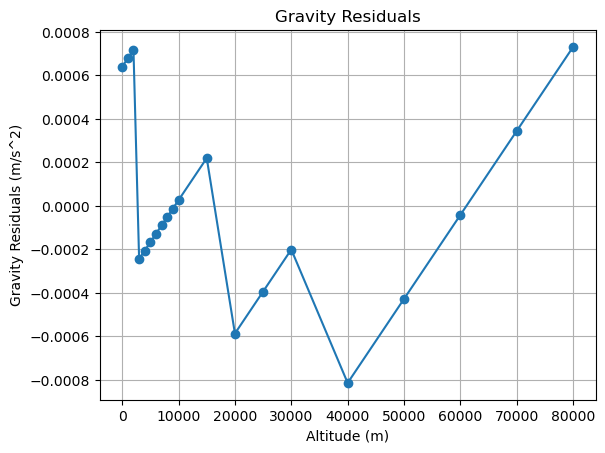

In [103]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [104]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x, a, b, c, d, e, f, g, h, i, j):
    return a + b * np.power(np.array(x), 1) + c * np.power(np.array(x), 2) + d * np.power(np.array(x),3) + e * np.power(np.array(x), 4) + f * np.power(np.array(x), 5) + g * np.power(np.array(x), 6) + h * np.power(np.array(x), 7) + i * np.power(np.array(x),8) + j * np.power(np.array(x),9)

In [105]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True,
                           p0=init_vals)
    
print(popt, pcov)

[ 8.97458481e-04 -5.27619375e-07  1.08753601e-10 -1.10784812e-14
  6.30687021e-19 -2.14852968e-23  4.46071547e-28 -5.51128027e-33
  3.71515478e-38 -1.05028793e-43] [[ 6.51516584e-08 -4.94578250e-11  1.20518566e-14 -1.36114443e-18
   8.33625829e-23 -2.98556885e-27  6.42224007e-32 -8.15489561e-37
   5.62477150e-42 -1.62274816e-47]
 [-4.94578250e-11  6.39501271e-14 -1.89217920e-17  2.36756962e-21
  -1.54377297e-25  5.76464888e-30 -1.27710689e-34  1.65716314e-39
  -1.16193607e-44  3.39518706e-50]
 [ 1.20518566e-14 -1.89217920e-17  6.09796753e-21 -8.04108767e-25
   5.42846020e-29 -2.07679572e-33  4.68281806e-38 -6.15742190e-43
   4.36162170e-48 -1.28473227e-53]
 [-1.36114443e-18  2.36756962e-21 -8.04108767e-25  1.09945552e-28
  -7.61245069e-33  2.96593166e-37 -6.77902812e-42  9.00660749e-47
  -6.43168085e-52  1.90669043e-57]
 [ 8.33625829e-23 -1.54377297e-25  5.42846020e-29 -7.61245069e-33
   5.36788219e-37 -2.11990196e-41  4.89546647e-46 -6.55644528e-51
   4.71183466e-56 -1.40399023e-61]
 

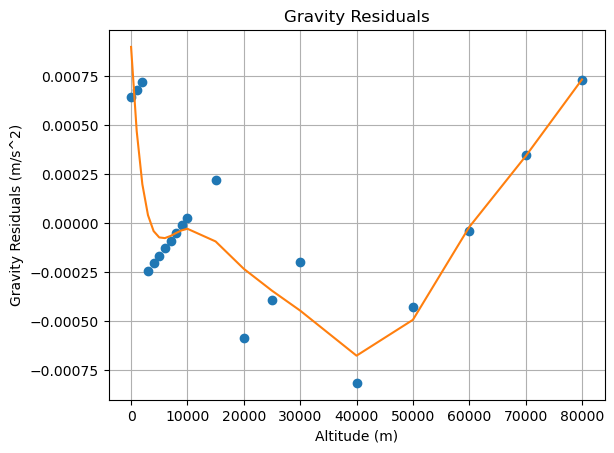

In [106]:

plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [107]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],
                 popt[6], popt[7], popt[8], popt[9]]

In [108]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h,i,j):
    return a0*(1+np.array(x)/a1)**(-2)+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)+i*np.power(np.array(x),8)+j*np.power(np.array(x),9)

In [109]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True,
                           p0=init_vals)

[ 9.79906129e+00  6.67503163e+06  8.19587254e-03 -6.30238979e-07
  1.08096821e-10 -1.10785380e-14  6.30691642e-19 -2.14853241e-23
  4.46071075e-28 -5.51127828e-33  3.71516396e-38 -1.05029496e-43] [[ 8.95075869e+07  4.68354211e+13 -8.95082438e+07  6.21780971e+00
   3.22076800e-06 -1.31271464e-11  1.54378703e-15 -8.36642611e-20
   2.34098067e-24 -3.55396869e-29  2.77907722e-34 -8.76942394e-40]
 [ 4.68354211e+13  2.95745794e+19 -4.68357649e+13  1.02449914e+06
   2.62739947e+00  1.76608162e-06  1.35678180e-10 -1.56008554e-14
   5.40322229e-19 -9.04471633e-24  7.45855341e-29 -2.42914940e-34]
 [-8.95082438e+07 -4.68357649e+13  8.95089006e+07 -6.21785533e+00
  -3.22079163e-06  1.31272409e-11 -1.54379825e-15  8.36648712e-20
  -2.34099777e-24  3.55399466e-29 -2.77909754e-34  8.76948808e-40]
 [ 6.21780971e+00  1.02449914e+06 -6.21785533e+00  1.41236463e-06
  -1.90676216e-13 -4.70703386e-18  4.02681138e-22 -1.81983787e-26
   4.63587899e-31 -6.66806528e-36  5.04461597e-41 -1.55862219e-46]
 [ 3.220

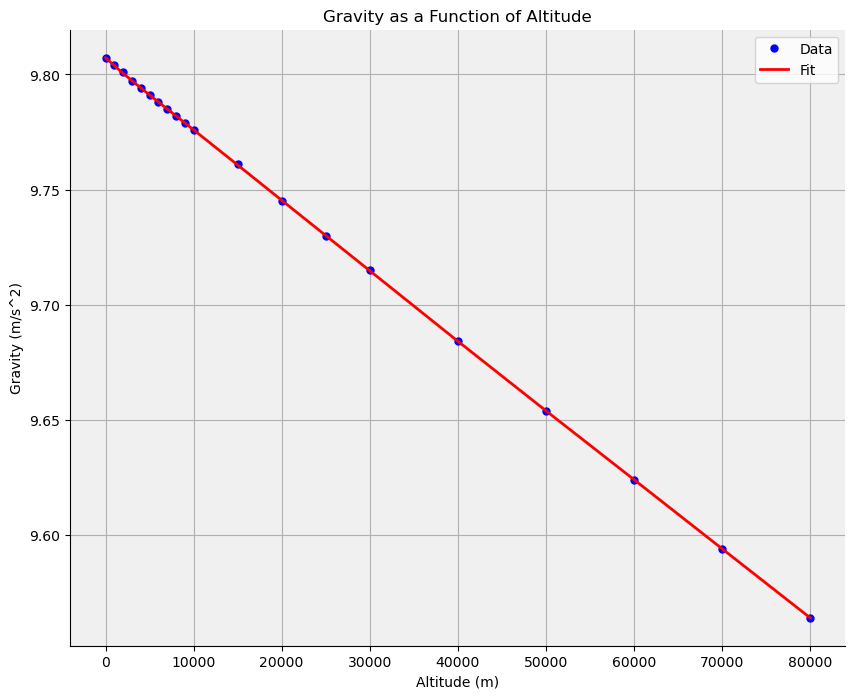

In [110]:
print(popt, pcov)
yfit = []
chi2 = 0
for i in range(0, npoints):
    yfit.append(fitfunction_combined(altitude[i], *popt))
    chi2 += (gravity[i] - yfit[i]) * (gravity[i] - yfit[i])

print("Chi^2 / dof = %.3E / %d" % (chi2, npoints - len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude, np.abs(yfit), color='r', linewidth=2, label="Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")
plt.legend()